# Training a Simple Graph Neural Network on the Proteins Dataset

In this notebook we will be training a simple Graph Neural Network on the Protein Dataset. Even with such a simple model we should still be able to obtain about 70% accuracy

In [10]:
import torch
torch.manual_seed(42)

## Loading the Data

Let's first load the data with torch_geometric. We can see that there are a total of 113 proteins and each graph has about 40 nodes. There are only 2 classes so this is a binary classication problem.

In [11]:
from torch_geometric.datasets import TUDataset
proteins_dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')
num_graphs = len(proteins_dataset)
print(f'Number of graphs: {num_graphs}')
print(f"Average number of nodes: {(proteins_dataset._data.num_nodes / num_graphs):.1f}")
print(f"Average number of edges: {(proteins_dataset._data.num_edges / num_graphs):.1f}")
print(f"Number of classes: {proteins_dataset.num_classes}")
print(f"Number of node features: {proteins_dataset.num_node_features}")

Number of graphs: 1113
Average number of nodes: 39.1
Average number of edges: 145.6
Number of classes: 2
Number of node features: 3


### Visualizing the Data
We can also use networkx to get a sense of what each graph looks like

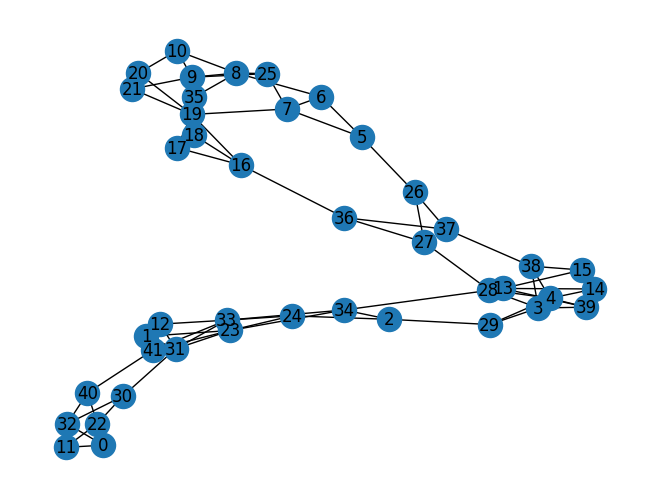

In [12]:
import networkx as nx

edges = proteins_dataset[0].edge_index.numpy().T

G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

## Training the Model
Finally we split data into train, test, and validation sets and train the simple GCN model, the source code of which is in the graph_neural_networks/models directory 

In [13]:
from graph_neural_networks.utils import split_dataset
train_dataset, val_dataset, test_dataset = split_dataset(proteins_dataset)

In [14]:
from graph_neural_networks.models import GCN
from graph_neural_networks.utils import train, test
model = GCN(in_channels=proteins_dataset.num_node_features, hidden_channels=64, out_channels=1) # 1 for binary classification

train(model, train_dataset)

test(model, test_dataset)

Epoch: 1, Loss: 0.0007739150708499176
Epoch: 2, Loss: 0.0007623741757221073
Epoch: 3, Loss: 0.0007508767435999475
Epoch: 4, Loss: 0.0007371151989229228
Epoch: 5, Loss: 0.0007309565800651875
Epoch: 6, Loss: 0.0007294142532944604
Epoch: 7, Loss: 0.0007274800456242943
Epoch: 8, Loss: 0.0007271847116640174
Epoch: 9, Loss: 0.0007322778811532739
Epoch: 10, Loss: 0.0007267962188269803
Epoch: 11, Loss: 0.000726488543362302
Epoch: 12, Loss: 0.0007267035091108432
Epoch: 13, Loss: 0.0007229391179565925
Epoch: 14, Loss: 0.0007256438131736341
Epoch: 15, Loss: 0.0007262739610068505
Epoch: 16, Loss: 0.0007247262417502581
Epoch: 17, Loss: 0.000718197229139251
Epoch: 18, Loss: 0.0007186589347523811
Epoch: 19, Loss: 0.0007243374830494921
Epoch: 20, Loss: 0.0007253502892125005
Epoch: 21, Loss: 0.0007248335421694878
Epoch: 22, Loss: 0.0007205156442857293
Epoch: 23, Loss: 0.000729381648289588
Epoch: 24, Loss: 0.0007195243805650648
Epoch: 25, Loss: 0.0007201675301176206
Epoch: 26, Loss: 0.000722741973609307

0.7321428571428571

## Conclusion
The graph nueral network achieves a little over 70% accuracy depending on the seed. Look at some of the other examples for some better performing models